In [1]:
# 1. Импортировать NumPy
import numpy as np
# Импортируем модули
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 31. Заменить максимальный элемент на 0

# -----------Вариант 1.-----------

# Однако, если в массиве будут повторяющиеся минимальные или максимальные элементы,
# то присваивание 0 производиться не будет
print('вариант 1')
m = np.random.random([5,5])
m.flatten()[m.argmax()] = 0
print(m)
print()

# -----------Вариант 2.-----------

# при повторяющихся минимальных элементах замена будет производиться везде (корректный вариант)
print('вариант 2')
m = np.random.randint(low=1, high=10, size=[5,5])
m[np.where(m == m.min())] = 0
print(m)
print()

вариант 1
[[0.08837489 0.42593782 0.37205752 0.50013697 0.72758943]
 [0.38522327 0.93976593 0.92480325 0.1595069  0.44173729]
 [0.48279699 0.14801561 0.06463237 0.48941455 0.41612413]
 [0.9695916  0.57268181 0.49259267 0.61553293 0.78726387]
 [0.4260549  0.15632759 0.88168782 0.83582361 0.80807441]]

вариант 2
[[8 0 0 7 7]
 [7 9 7 6 7]
 [2 2 3 7 8]
 [2 2 5 4 4]
 [5 6 9 6 5]]



In [3]:
# 32. Создать структурированный массив с координатами x, y на сетке в квадрате [0,1]x[0,1]
m = np.zeros([10,10], [('x', float), ('y', float)])
m['x'], m['y'] = np.meshgrid(np.linspace(0,1,10), np.linspace(0,1,10))

In [4]:
# 33. Из двух массивов создать матрицу Коши C (Cij = 1/(xi-yj))

a = np.arange(8)
b = a + 0.5
c = 1 / np.subtract.outer(a,b)
print(np.linalg.det(c))

3638.1636371179666


In [5]:
# 34. Найти минимальное и максимальное значение, принимаемое каждым числовым типом numpy

for dtype in [np.int8, np.int32, np.int64]:
   print(np.iinfo(dtype).min)
   print(np.iinfo(dtype).max)
for dtype in [np.float32, np.float64]:
   print(np.finfo(dtype).min)
   print(np.finfo(dtype).max)
   print(np.finfo(dtype).eps)

-128
127
-2147483648
2147483647
-9223372036854775808
9223372036854775807
-3.4028235e+38
3.4028235e+38
1.1920929e-07
-1.7976931348623157e+308
1.7976931348623157e+308
2.220446049250313e-16


In [6]:
# 35. Напечатать все значения в массиве
np.set_printoptions(threshold=np.nan)
m = np.zeros((5, 5))
print(m)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [7]:
# 36. Найти ближайшее к заданному значению число в заданном массиве

v = np.random.randint(low=1, high=100, size=[5,5])
print(v)

# к данному числу нужно найти ближайшее число в массиве
approx = 21

# -----------Вариант 1.-----------
# (если несколько минимальных элементов, возьмет только один)

print('\nвариант 1')
index = (np.abs(v-approx).argmin())
print(v.flat[index])

# -----------Вариант 2.-----------
# (учитывает несколько вариантов ближайших чисел)

def find_nearest(a, aim):
    """ функция находит индексы минимальных чисел к числу 'aim' """
    v = np.abs(a - aim)
    idx = np.where(v == v.min())
    return idx

# может быть так, что несколько чисел окажутся ближайшими к числу
# напрмер к числу 10 ближайшие 9 и 11
print('\nвариант 2')
a = find_nearest(v, approx)
print('ближайшее(-ие) к числу approx')
print(np.unique(v[a]))

[[18 50 66 31 18]
 [ 8 42 43 24 10]
 [67 90 96  6 73]
 [45 18 83 87 51]
 [50 18 93 91 85]]

вариант 1
18

вариант 2
ближайшее(-ие) к числу approx
[18 24]


In [8]:
# 37. Создать структурированный массив, представляющий координату (x,y) и цвет (r,g,b)
Z = np.zeros(10, [ ('position', [('x', float, 1),
                                 ('y', float, 1)]),
                  ('color',    [('r', float, 1),
                                ('g', float, 1),
                                ('b', float, 1)])])
print(Z)

[((0., 0.), (0., 0., 0.)) ((0., 0.), (0., 0., 0.))
 ((0., 0.), (0., 0., 0.)) ((0., 0.), (0., 0., 0.))
 ((0., 0.), (0., 0., 0.)) ((0., 0.), (0., 0., 0.))
 ((0., 0.), (0., 0., 0.)) ((0., 0.), (0., 0., 0.))
 ((0., 0.), (0., 0., 0.)) ((0., 0.), (0., 0., 0.))]


In [9]:
# 38. Дан массив (5,2) координат, найти расстояние от каждой до каждой точки

from scipy.spatial import distance_matrix, distance

m = np.random.randint(low=0, high=100, size=[5,2])
print('массив:')
print(m)

print()
print('вариант 1')
dst = distance_matrix(m, m)
print(dst)

print()
print('вариант 2')
dst2 = distance.cdist(m,m)
print(dst2)

массив:
[[94 91]
 [49 35]
 [69 35]
 [90 26]
 [57  4]]

вариант 1
[[ 0.         71.84010022 61.32699243 65.12296062 94.5409964 ]
 [71.84010022  0.         20.         41.97618372 32.01562119]
 [61.32699243 20.          0.         22.84731932 33.24154028]
 [65.12296062 41.97618372 22.84731932  0.         39.66106403]
 [94.5409964  32.01562119 33.24154028 39.66106403  0.        ]]

вариант 2
[[ 0.         71.84010022 61.32699243 65.12296062 94.5409964 ]
 [71.84010022  0.         20.         41.97618372 32.01562119]
 [61.32699243 20.          0.         22.84731932 33.24154028]
 [65.12296062 41.97618372 22.84731932  0.         39.66106403]
 [94.5409964  32.01562119 33.24154028 39.66106403  0.        ]]


In [10]:
# 39. Преобразовать массив из int в float

# создание массива целочисленных значений
m = np.random.randint(low=1, high=100, size=[5,5])

# преобразование в float
m = m.astype('f', copy=False)

print(m)

[[49. 35.  5. 64.  8.]
 [42. 69. 44. 30. 49.]
 [10. 92. 92. 80. 80.]
 [36. 60. 46. 85. 87.]
 [82. 81.  1. 33. 32.]]


In [11]:
# 40. Файл лежит в папке "file/40/file.txt", как прочитать файл?
v = np.genfromtxt('files/40/file.txt', delimiter=',')
print(v)

[[ 1.  2.  3.  4.  5.]
 [ 6. nan nan  7.  8.]
 [nan nan  9. 10. 11.]]


In [12]:
# 41. Каков эквивалент функции enumerate для numpy массивов?

a = np.array([[1, 2], [3, 4]])
for index, x in np.ndenumerate(a):
    print(index, x)

(0, 0) 1
(0, 1) 2
(1, 0) 3
(1, 1) 4


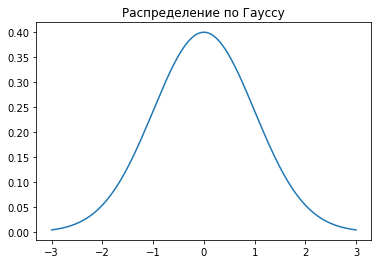

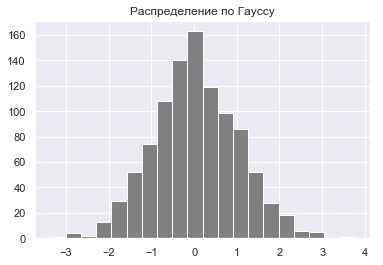

In [13]:
# 42. Сформировать матрицу по Гауссу

from scipy.stats import norm

x = np.linspace(-3,3,1000)
y = norm.pdf(x, loc=0, scale=1)

# формируем матрицу по Гауссу
m = np.column_stack((x,y))

plt.plot(m[:,0],m[:,1]);
plt.title('Распределение по Гауссу');
plt.show()
# -----------дополнительно.-----------

# формируем случайную матрицу, близкую к нормальному распределению
m = np.random.randn(1000)

sns.set()

plt.title('Распределение по Гауссу');
plt.hist(m,20,color='grey');
plt.show()

In [14]:
# 43. Случайно расположить (заменить) p элементов в 2D массив

# кол-во заменяемых элементов
p = 5

# -----------Вариант 1.-----------

print('------вариант 1------')
m = np.random.randint(low=1, high=100, size=[5,5])
print('\nмассив:')
print(m)
print('\nс заменой')
np.put(m, np.random.choice(range(m.size), p, replace=False), 0)
print(m)
print()

# -----------Вариант 2.-----------

print('------вариант 2------')
m2 = np.random.randint(low=1, high=100, size=[5,5])
print('\nмассив:')
print(m2)

# m.size ---> вычисляет кол-во элементов в массиве (аналог numel в MATLAB)
# np.random.permutation ---> создает вектор в случайном порядке

idx = np.random.permutation(m2.size)[:np.abs(p)]
print('\nслучайные элементы:')
print(idx)

print('\nмассив с заменой случайных элементов')
m2.flat[idx] = 0
print(m2)

------вариант 1------

массив:
[[18 34  3 14 26]
 [62 19 87  4 73]
 [ 1  8 35 54 36]
 [62 62 62 55 82]
 [40 98 95 30 61]]

с заменой
[[18  0  3 14 26]
 [62 19  0  0 73]
 [ 1  8 35 54  0]
 [62 62  0 55 82]
 [40 98 95 30 61]]

------вариант 2------

массив:
[[80 45 90 61 24]
 [31 40 75 67 72]
 [51 68 31 33 84]
 [23 12 62 56  1]
 [79 97 32  1 96]]

случайные элементы:
[20  4 22  6  7]

массив с заменой случайных элементов
[[80 45 90 61  0]
 [31  0  0 67 72]
 [51 68 31 33 84]
 [23 12 62 56  1]
 [ 0 97  0  1 96]]


In [15]:
# 44. Отнять среднее из каждой строки в матрице

m = np.random.randint(low=1, high=100, size=[3,3])
print('массив:')
print(m)
print()
print('средние значения каждой строки матрицы')
print(m.mean(axis=1))

# keepdims ---> сохранить размерность исходного массива

print()
print('вычитание из матрицы средних значений')
m = m - m.mean(axis=1, keepdims=True)

print(m)

массив:
[[19 56 22]
 [ 8 85 19]
 [19 39 42]]

средние значения каждой строки матрицы
[32.33333333 37.33333333 33.33333333]

вычитание из матрицы средних значений
[[-13.33333333  23.66666667 -10.33333333]
 [-29.33333333  47.66666667 -18.33333333]
 [-14.33333333   5.66666667   8.66666667]]


In [16]:
# 45. Отсортировать матрицу по n-ому столбцу

n = 2

m = np.random.randint(low=1, high=100, size=[5,5])
print('массив:')
print(m)
print()
print('сортированный массив по n-ому столбцу')
print(m[m[:,n].argsort()])
print()

массив:
[[14 77 12 35  2]
 [45 31 31  9 10]
 [82  3 19  9 24]
 [87  7 84 22 91]
 [43  4 37 81 71]]

сортированный массив по n-ому столбцу
[[14 77 12 35  2]
 [82  3 19  9 24]
 [45 31 31  9 10]
 [43  4 37 81 71]
 [87  7 84 22 91]]



In [17]:
# 46. Определить, есть ли в 2D массиве нулевые столбцы

m = np.random.randint(low=0, high=2, size=[2,10])

# -----------Вариант 1.-----------
# (возвращает булево значение)

print('\n------вариант 1------')
print()
print(m)
print()
print((~m.any(axis=0)).any())

# -----------Вариант 2.-----------
# (возвращает индексы колонок, решение через сумму)
print('\n------вариант 2------')
print()
null_columns = np.where(np.sum(a=m, axis=0) == 0)

if null_columns[0].size > 0:
    print('Имеются нулевые столбцы:', null_columns[0])
else:
    print('Нулевых столбцов нет')
    
print()    
print(m)


------вариант 1------

[[1 1 0 0 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 0 0 0]]

True

------вариант 2------

Имеются нулевые столбцы: [2 8]

[[1 1 0 0 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 0 0 0]]


In [18]:
# 47. Дан массив, добавить 1 к каждому элементу с индексом, заданным в другом массиве
# осторожно с повторами (их необходимо суммировать)

# функция bincount ---> мощная вещь (считает кол-во вхождений в массив)
# нужна корректная работа как с одномерными так и с многомерными массивами
# если в матрице 'a' имеются повторы, то необходимо эти повторы суммировать

b = np.ones([5,5])
sh = b.shape

b = b.flatten()
a = np.random.randint(low=0, high=b.size, size=20)

b += np.bincount(a, minlength=b.size)
b = b.reshape(sh)

print(b)

[[1. 1. 3. 3. 1.]
 [1. 3. 2. 3. 1.]
 [2. 1. 2. 1. 1.]
 [1. 2. 2. 3. 2.]
 [3. 1. 1. 2. 2.]]


In [19]:
# 47.1 Дан массив, добавить 1 к каждому элементу с индексом, заданным в другом массиве
# осторожно с повторами (суммировать не нужно)

b = np.ones([5, 5])

a = np.random.randint(low=0, high=b.size, size=[10])

b.flat[a] += 1

print(b)


[[2. 1. 2. 1. 1.]
 [1. 2. 1. 1. 2.]
 [2. 1. 1. 1. 1.]
 [2. 2. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [20]:
# 48. Дан массив (w,h,3) (картинка) dtype=ubyte, посчитать количество различных цветов

w,h = 16,16
I = np.random.randint(0, 2, (h,w,3)).astype(np.ubyte)
F = I[...,0] * 256 * 256 + I[...,1] * 256 + I[...,2]
n = len(np.unique(F))
print(np.unique(I))

[0 1]


In [21]:
# 49. Дан четырехмерный массив, посчитать сумму по последним двум осям

A = np.random.randint(0,10, (3,4,3,4))
sum = A.reshape(A.shape[:-2] + (-1,)).sum(axis=-1)
print(sum)

[[44 51 46 39]
 [48 72 60 59]
 [54 35 53 67]]


In [22]:
# 50. Найти диагональные элементы произведения матриц

a = np.array([[1,2], [3,4]])
b = np.array([[5,6], [7,8]])

# -----------Вариант 1.-----------
# (медленный вариант)
print('вариант 1')
print(np.diag(np.dot(a, b)))
print()

print(np.dot(a,b))

# -----------Вариант 2.-----------
# (быстрый вариант)
print('вариант 2')
print(np.sum(a*b.T, axis=1))

вариант 1
[19 50]

[[19 22]
 [43 50]]
вариант 2
[19 50]


In [23]:
# 51. Дан вектор [1, 2, 3, 4, 5], построить новый вектор с тремя нулями между каждым значением

v = np.arange(start=1, stop=6)
every = 3
v2 = np.zeros(len(v) + (len(v)-1)*(every))
v2[::every+1] = v

print(v2)

[1. 0. 0. 0. 2. 0. 0. 0. 3. 0. 0. 0. 4. 0. 0. 0. 5.]


In [24]:
# 52. Поменять две случайные строки в матрице

# формирование матрицы
m = np.arange(25).reshape(5,5)
print(m)

# случайно отбираем две строки в матрице
r = np.random.choice(range(m.shape[0]), 2, replace=False)

# присвоение переменным
r1, r2 = r[0], r[1]

print()
print('случайно выбранные строки:' + str(r1) + ',' + str(r2))
print()

m[[r1,r2]] = m[[r2,r1]]
print(m)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]

случайно выбранные строки:2,0

[[10 11 12 13 14]
 [ 5  6  7  8  9]
 [ 0  1  2  3  4]
 [15 16 17 18 19]
 [20 21 22 23 24]]


In [25]:
# 53. Вычислить имеются ли в массиве какие-либо значения превышающие 13?

m = np.random.randint(low=1, high=15, size=[3,3])
print(m)
print()
print(np.any(m > 13))

[[ 2 12  9]
 [ 8  9  9]
 [14 10  1]]

True


In [26]:
# 54. Сортировать массив по строкам и стобцам

rand = np.random.RandomState(42)

m = rand.randint(0, 10, [4,6])

# сортируем по столбцам
print('сортировка по столбцам')
m1 = np.sort(m, axis=0)
print(m1)

# сортируем по строкам
print('сортировка по строкам')
m2 = np.sort(m, axis=1)
print(m2)

сортировка по столбцам
[[2 1 4 0 1 5]
 [5 2 5 4 3 7]
 [6 3 7 4 6 7]
 [7 6 7 4 9 9]]
сортировка по строкам
[[3 4 6 6 7 9]
 [2 3 4 6 7 7]
 [1 2 4 5 7 7]
 [0 1 4 5 5 9]]


In [27]:
# 55. Создать структурированный массив

s = np.dtype({'names': ('name', 'age', 'weight'),
         'formats': ('U10', 'i4', 'f8')})

print(s)

[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]


In [28]:
# 56. Вычислить ранг матрицы

m = np.random.randint(low=1, high=100, size=[3,3])
rank = np.linalg.matrix_rank(m)
print(rank)

3


In [29]:
# 57. Найти n наибольших уникальных значений в массиве

n = 3

m = np.random.randint(low=1, high=10, size=[2,3])
print(m)

# тяжелый варант (стоит найти легче)
print()
print('n наибольших значений в массиве')
print(np.unique((np.sort(m.flat)))[::-1][:n])

[[7 2 8]
 [8 9 1]]

n наибольших значений в массиве
[9 8 7]


In [30]:
# 58. Узнать размерность матрицы

m = np.random.randint(low=1, high=10, size=[3,5])
print(m.shape)

(3, 5)


[[3 0 1 4 2]
 [3 0 1 4 2]
 [2 4 3 0 1]
 [3 4 0 2 1]
 [4 2 3 0 1]]


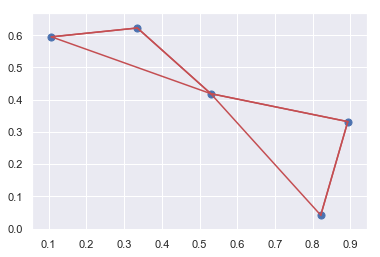

In [31]:
# 59. Написать алгоритм поиска ближайших соседей

rand = np.random.RandomState(6)

K=2
r = rand.rand(5,2)

# вычислений матрицы дистанций
dist_sq = np.sum((r[:, np.newaxis,:] - r[np.newaxis,:,:])**2, axis=-1)

# выводим ближайших соседей
nearest = np.argpartition(dist_sq, K+1, axis=1)

# визуализация
plt.scatter(r[:,0], r[:,1], s=50)
for i in range(r.shape[0]):
    for j in nearest[i, :K+1]:
        # отображение линий от r[i] до r[j]
        plt.plot(*zip(r[j], r[i]), color='r')

print(nearest)

In [32]:
# 60. Написать алгоритм игры "жизнь"

def iterate(m):
    
    # кол-во соседей
    N = (m[0:-2,0:-2] + m[0:-2,1:-1] + m[0:-2,2:] +
         m[1:-1,0:-2]                + m[1:-1,2:] +
         m[2:  ,0:-2] + m[2:  ,1:-1] + m[2:  ,2:])

    # правила
    birth = (N == 3) & (m[1:-1,1:-1]==0)
    survive = ((N == 2) | (N == 3)) & (m[1:-1,1:-1] == 1)
    m[...] = 0
    m[1:-1,1:-1][birth | survive] = 1
    return m

m = np.random.randint(0,2,(10,10))

for i in range(10):
    m = iterate(m)
#     print(m)